In [543]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [544]:
ls

 Volume in drive C has no label.
 Volume Serial Number is F8E0-50A7

 Directory of C:\Users\jitai\Python Foundation Case Study 2 - Credit Card Case Study

16-07-2022  16:52    <DIR>          .
15-07-2022  22:15    <DIR>          ..
16-07-2022  03:07    <DIR>          .ipynb_checkpoints
16-07-2022  16:52           187,341 case study 2.ipynb
14-01-2019  19:07            88,546 Credit Card Case Study - Case Study 2.pdf
04-01-2018  08:19           149,865 Credit Card Data.xlsx
27-03-2018  15:50             5,209 Customer Acqusition.csv
27-03-2018  15:53            44,426 Repayment.csv
27-03-2018  15:52            55,393 spend.csv
16-07-2022  03:07           166,989 Untitled.ipynb
               7 File(s)        697,769 bytes
               3 Dir(s)  99,470,483,456 bytes free


In [545]:
CC_Data = pd.read_excel("Credit Card Data.xlsx")
cust_aq = pd.read_csv("Customer Acqusition.csv")
rep     = pd.read_csv("Repayment.csv")
spend   = pd.read_csv("spend.csv")
spend

Sl No: Customer      Month        Type     Amount
0          1       A1  12-Jan-04   JEWELLERY  485470.80
1          2       A1   3-Jan-04       PETRO  410556.13
2          3       A1  15-Jan-04     CLOTHES   23740.46
3          4       A1  25-Jan-04        FOOD  484342.47
4          5       A1  17-Jan-05      CAMERA  369694.07
...      ...      ...        ...         ...        ...
1495    1496      A67   4-Feb-06  BUS TICKET  356872.73
1496    1497      A68  25-Mar-06  BUS TICKET  204971.10
1497    1498      A69  31-Mar-06  BUS TICKET   50449.44
1498    1499      A70  23-Mar-06  BUS TICKET   80593.94
1499    1500      A71  24-Mar-06  BUS TICKET  194447.62

[1500 rows x 5 columns]

In [546]:
CC_Data.drop(["No"],axis = 1,inplace =True)
CC_Data.isna().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [547]:
cust_aq.isna().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [548]:
rep.drop("Unnamed: 4",axis =1,inplace= True)

In [549]:
rep = rep.dropna(subset =["Customer","Month","Amount"])
rep.rename({"Amount": "Repayed_Amount"}, axis=1,inplace = True)
rep.drop(["SL No:"],axis =1 ,inplace = True)
rep

Customer      Month  Repayed_Amount
0          A1  12-Jan-04       495414.75
1          A1   3-Jan-04       245899.02
2          A1  15-Jan-04       259490.06
3          A1  25-Jan-04       437555.12
4          A1  17-Jan-05       165972.88
...       ...        ...             ...
1495      A67   9-May-05        55638.77
1496      A68  10-May-06       319836.49
1497      A69  11-Jul-06       247628.45
1498      A70  12-Aug-05       454016.51
1499      A71  13-Sep-04        56286.33

[1500 rows x 3 columns]

In [550]:
spend.drop(["Sl No:"],axis =1 ,inplace = True)
spend.isna().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [551]:
cust_database = CC_Data.merge(spend)
cust_database = cust_database.merge(rep,on = ["Customer","Month"] )
cust_database["Age"] = cust_database["Age"].astype(int)
cust_database["Profit"] =  cust_database.Repayed_Amount - cust_database.Amount
cust_database

Customer  Age        City   Product   Limit Company        Segment  \
0         A1   34   BANGALORE      Gold  500000      C1  Self Employed   
1         A1   34   BANGALORE      Gold  500000      C1  Self Employed   
2         A1   34   BANGALORE      Gold  500000      C1  Self Employed   
3         A1   34   BANGALORE      Gold  500000      C1  Self Employed   
4         A1   34   BANGALORE      Gold  500000      C1  Self Employed   
..       ...  ...         ...       ...     ...     ...            ...   
858      A96   71     CHENNAI    Silver  100000     C19   Salaried_Pvt   
859      A97   69  TRIVANDRUM  Platimum   10000     C20           Govt   
860      A98   20    CALCUTTA  Platimum   10001     C21  Normal Salary   
861      A99   52    CALCUTTA  Platimum   10002     C22  Self Employed   
862     A100    8      COCHIN    Silver  100000      C5   Salaried_MNC   

         Month          Type     Amount  Repayed_Amount     Profit  
0    12-Jan-04     JEWELLERY  485470.80       495414.75    9943.95  
1    12-Jan-04     JEWELLERY  485470.80       350446.82 -135023.98  
2    12-Jan-04  TRAIN TICKET  440563.22       495414.75   54851.53  
3    12-Jan-04  TRAIN TICKET  440563.22       350446.82  -90116.40  
4     3-Jan-04         PETRO  410556.13       245899.02 -164657.11  
..         ...           ...        ...             ...        ...  
858  25-Jan-04          BIKE   54729.66       310992.30  256262.64  
859  12-Jan-04          AUTO  139018.26       121874.90  -17143.36  
860   3-Jan-04      SHOPPING  284521.06       337815.57   53294.51  
861  15-Jan-04    AIR TICKET   90184.22        25682.73  -64501.49  
862  25-Jan-04    BUS TICKET  224786.88        69551.19 -155235.69  

[863 rows x 12 columns]

In [552]:
cust_database['Age'].values[cust_database['Age'].values < 18] = cust_database['Age'].median()
cust_database

Customer  Age        City   Product   Limit Company        Segment  \
0         A1   34   BANGALORE      Gold  500000      C1  Self Employed   
1         A1   34   BANGALORE      Gold  500000      C1  Self Employed   
2         A1   34   BANGALORE      Gold  500000      C1  Self Employed   
3         A1   34   BANGALORE      Gold  500000      C1  Self Employed   
4         A1   34   BANGALORE      Gold  500000      C1  Self Employed   
..       ...  ...         ...       ...     ...     ...            ...   
858      A96   71     CHENNAI    Silver  100000     C19   Salaried_Pvt   
859      A97   69  TRIVANDRUM  Platimum   10000     C20           Govt   
860      A98   20    CALCUTTA  Platimum   10001     C21  Normal Salary   
861      A99   52    CALCUTTA  Platimum   10002     C22  Self Employed   
862     A100   34      COCHIN    Silver  100000      C5   Salaried_MNC   

         Month          Type     Amount  Repayed_Amount     Profit  
0    12-Jan-04     JEWELLERY  485470.80       495414.75    9943.95  
1    12-Jan-04     JEWELLERY  485470.80       350446.82 -135023.98  
2    12-Jan-04  TRAIN TICKET  440563.22       495414.75   54851.53  
3    12-Jan-04  TRAIN TICKET  440563.22       350446.82  -90116.40  
4     3-Jan-04         PETRO  410556.13       245899.02 -164657.11  
..         ...           ...        ...             ...        ...  
858  25-Jan-04          BIKE   54729.66       310992.30  256262.64  
859  12-Jan-04          AUTO  139018.26       121874.90  -17143.36  
860   3-Jan-04      SHOPPING  284521.06       337815.57   53294.51  
861  15-Jan-04    AIR TICKET   90184.22        25682.73  -64501.49  
862  25-Jan-04    BUS TICKET  224786.88        69551.19 -155235.69  

[863 rows x 12 columns]

In [553]:
cust_post_trans = cust_database
cust_post_trans.loc[cust_post_trans.Limit < cust_post_trans.Amount,"Amount" ] = cust_post_trans["Limit"]/2
cust_post_trans.loc[cust_post_trans.Limit < cust_post_trans.Repayed_Amount,"Repayed_Amount" ] = cust_post_trans["Limit"]
cust_post_trans

Customer  Age        City   Product   Limit Company        Segment  \
0         A1   34   BANGALORE      Gold  500000      C1  Self Employed   
1         A1   34   BANGALORE      Gold  500000      C1  Self Employed   
2         A1   34   BANGALORE      Gold  500000      C1  Self Employed   
3         A1   34   BANGALORE      Gold  500000      C1  Self Employed   
4         A1   34   BANGALORE      Gold  500000      C1  Self Employed   
..       ...  ...         ...       ...     ...     ...            ...   
858      A96   71     CHENNAI    Silver  100000     C19   Salaried_Pvt   
859      A97   69  TRIVANDRUM  Platimum   10000     C20           Govt   
860      A98   20    CALCUTTA  Platimum   10001     C21  Normal Salary   
861      A99   52    CALCUTTA  Platimum   10002     C22  Self Employed   
862     A100   34      COCHIN    Silver  100000      C5   Salaried_MNC   

         Month          Type     Amount  Repayed_Amount     Profit  
0    12-Jan-04     JEWELLERY  485470.80       495414.75    9943.95  
1    12-Jan-04     JEWELLERY  485470.80       350446.82 -135023.98  
2    12-Jan-04  TRAIN TICKET  440563.22       495414.75   54851.53  
3    12-Jan-04  TRAIN TICKET  440563.22       350446.82  -90116.40  
4     3-Jan-04         PETRO  410556.13       245899.02 -164657.11  
..         ...           ...        ...             ...        ...  
858  25-Jan-04          BIKE   54729.66       100000.00  256262.64  
859  12-Jan-04          AUTO    5000.00        10000.00  -17143.36  
860   3-Jan-04      SHOPPING    5000.50        10001.00   53294.51  
861  15-Jan-04    AIR TICKET    5001.00        10002.00  -64501.49  
862  25-Jan-04    BUS TICKET   50000.00        69551.19 -155235.69  

[863 rows x 12 columns]

In [554]:
cust_post_trans.Customer.nunique()

100

In [555]:
cust_post_trans.Segment.nunique()

5

In [571]:
# cust_post_trans.groupby(by="Customer")["Amount"].mean()
cust_post_trans.Month = pd.to_datetime(cust_post_trans.Month)
cust_post_trans['Monthly'] = cust_post_trans['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
cust_post_trans['Yearly'] = cust_post_trans['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
ca = cust_post_trans.loc[:,["Customer","Month","Amount",'Monthly','Yearly',"Repayed_Amount","Profit"]]
ca = ca.groupby(['Yearly','Monthly']).mean()
ca

Amount  Repayed_Amount         Profit
Yearly Monthly                                                
2004   April       84580.377500    98593.678750  -91854.148750
       February   124098.224615   104611.463077     980.756154
       January    152679.032306   168011.968222    9382.601806
       March      214381.002000   231033.168000    8835.860000
       May         76680.121250   162203.560000   43497.368750
       November   114546.332000   152581.340000  -96907.126000
       September  253033.595000   208867.745000  -99483.592500
2005   April       85217.405455   122542.270000  -40752.795455
       August     125360.822222   126606.633333   51587.682222
       December   178414.630000   255658.184000  195231.340000
       February   177300.949643   196570.010268   15576.986161
       January    225252.435000   171000.652143  -74628.386429
       July        57882.300000   112001.640000   16416.766667
       June       154409.785000   134254.051111  -22694.847222
       May        167056.485200   218382.564200   55169.185600
       November   179810.517692   237357.707692   50598.431538
       October    114172.092000   205037.904000  143058.690000
       September  132683.844000    80788.362000   37676.978000
2006   April      120899.863793   165941.162414   67317.545517
       August     229720.620000   230670.545000     949.925000
       December   239256.802500   215885.382500  -55894.450000
       February   144429.850000   168754.142105   -5409.963684
       January    254002.206000   302988.674000   97155.220000
       July       186764.023750   234470.061250   11954.275000
       June       141153.406667   216022.196667  260980.156667
       March      150854.715490   156587.265588    2918.812059
       May        102126.635909   177182.129091   92528.675000
       November   206207.333750   299298.461250   84142.311250
       October    247410.367500   260131.567500   12721.200000
       September  183302.980000   319092.290000  135789.310000

In [557]:
ca["Interest"] = (2.9 * ca.loc[ca.Profit>0]["Profit"])/100
ca = ca.fillna(0)
ca

Amount  Repayed_Amount         Profit     Interest
Yearly Monthly                                                             
2004   April       84580.377500    98593.678750  -91854.148750     0.000000
       February   124098.224615   104611.463077     980.756154    28.441928
       January    152679.032306   168011.968222    9382.601806   272.095452
       March      214381.002000   231033.168000    8835.860000   256.239940
       May         76680.121250   162203.560000   43497.368750  1261.423694
       November   114546.332000   152581.340000  -96907.126000     0.000000
       September  253033.595000   208867.745000  -99483.592500     0.000000
2005   April       85217.405455   122542.270000  -40752.795455     0.000000
       August     125360.822222   126606.633333   51587.682222  1496.042784
       December   178414.630000   255658.184000  195231.340000  5661.708860
       February   177300.949643   196570.010268   15576.986161   451.732599
       January    225252.435000   171000.652143  -74628.386429     0.000000
       July        57882.300000   112001.640000   16416.766667   476.086233
       June       154409.785000   134254.051111  -22694.847222     0.000000
       May        167056.485200   218382.564200   55169.185600  1599.906382
       November   179810.517692   237357.707692   50598.431538  1467.354515
       October    114172.092000   205037.904000  143058.690000  4148.702010
       September  132683.844000    80788.362000   37676.978000  1092.632362
2006   April      120899.863793   165941.162414   67317.545517  1952.208820
       August     229720.620000   230670.545000     949.925000    27.547825
       December   239256.802500   215885.382500  -55894.450000     0.000000
       February   144429.850000   168754.142105   -5409.963684     0.000000
       January    254002.206000   302988.674000   97155.220000  2817.501380
       July       186764.023750   234470.061250   11954.275000   346.673975
       June       141153.406667   216022.196667  260980.156667  7568.424543
       March      150854.715490   156587.265588    2918.812059    84.645550
       May        102126.635909   177182.129091   92528.675000  2683.331575
       November   206207.333750   299298.461250   84142.311250  2440.127026
       October    247410.367500   260131.567500   12721.200000   368.914800
       September  183302.980000   319092.290000  135789.310000  3937.889990

In [558]:
p_type = cust_post_trans.groupby(["Type"]).sum()
p_type.sort_values(["Amount"], ascending=False).head(5)["Amount"]

Type
CAMERA          19943003.00
PETRO           13667106.67
FOOD            12888728.98
BUS TICKET      11449175.92
MOVIE TICKET    10123108.77
Name: Amount, dtype: float64

In [559]:
city  = cust_post_trans.groupby(["City"]).sum()
city.sort_values(["Amount"], ascending=False)["Amount"]

City
COCHIN        27653817.49
BANGALORE     26800219.96
CALCUTTA      26677187.59
BOMBAY        18806631.04
CHENNAI       10039376.90
TRIVANDRUM     8967235.19
DELHI          8324392.47
PATNA          6596221.37
Name: Amount, dtype: float64

In [560]:
age = cust_post_trans
age["AGE_B"] =  pd.cut(cust_post_trans["Age"],[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80])
# age.sort_values(["Amount"], ascending=False)["Amount"]
age.groupby(["AGE_B"])["Amount"].sum().sort_values( ascending=False)

AGE_B
(30, 35]    63983809.61
(55, 60]    13924671.74
(65, 70]     9944877.41
(40, 45]     9361097.03
(35, 40]     9183407.35
(25, 30]     7842979.38
(50, 55]     6964124.60
(45, 50]     4352595.92
(15, 20]     3138388.07
(75, 80]     2590853.16
(60, 65]     1430720.44
(70, 75]      977547.30
(20, 25]      170010.00
(10, 15]           0.00
Name: Amount, dtype: float64

In [561]:
cust = cust_post_trans.groupby(["Customer"])["Amount"].sum().sort_values(ascending=False)
cust.head(10)

Customer
A60    11759608.01
A61     7908464.76
A42     7675024.51
A40     7012189.37
A41     6224590.00
A39     6161819.30
A44     5987800.73
A45     5841684.41
A38     5643982.01
A43     5596758.59
Name: Amount, dtype: float64

Product                  Gold    Platimum      Silver
City       Yearly                                    
BANGALORE  2004    9953342.66   700899.56  1089383.07
           2005    8226892.18   686106.18    80066.94
           2006    5470495.35   189098.38   403935.64
BOMBAY     2004    8829107.79   815564.17   732089.03
           2005    3320901.75   291794.44   158988.54
           2006    3490846.69   492541.33   674797.30
CALCUTTA   2004    7496411.13  2706285.45   400005.00
           2005    5603651.51  3800427.46   147380.56
           2006    5025299.45   765502.96   732224.07
CHENNAI    2004    1157489.57  3580099.62   182053.86
           2005    1040038.69  1991635.68   102771.82
           2006     176726.17  1658557.99   150003.50
COCHIN     2004    7209014.44  2873519.71   646599.46
           2005    6655251.00  2608262.17   200003.50
           2006    4425012.70  2499512.69   536641.82
DELHI      2004    3880542.73    50001.50   504492.90
           2005     947109.76   185238.64   275081.67
           2006    2230568.57    76785.72   174570.98
PATNA      2004    2465165.30         NaN   805954.30
           2005     221293.03  1254215.44   434786.32
           2006     355605.76   659200.22   400001.00
TRIVANDRUM 2004    1413567.43  2823327.43   209667.48
           2005     237335.43  2501029.85    50000.50
           2006     502731.73   937471.52   292103.82

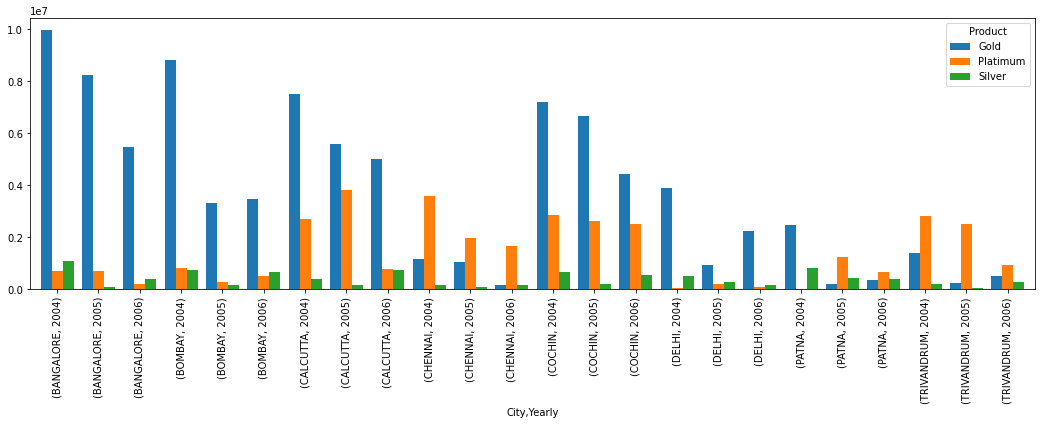

In [562]:
city = cust_post_trans.groupby(["City","Product","Yearly"]).sum()
# city

city = pd.pivot_table(data = city,index=["City","Yearly"],columns='Product',aggfunc="sum",values="Amount")
city.plot(kind="bar",figsize=(18,5),width=0.8)
city

<AxesSubplot:xlabel='City'>

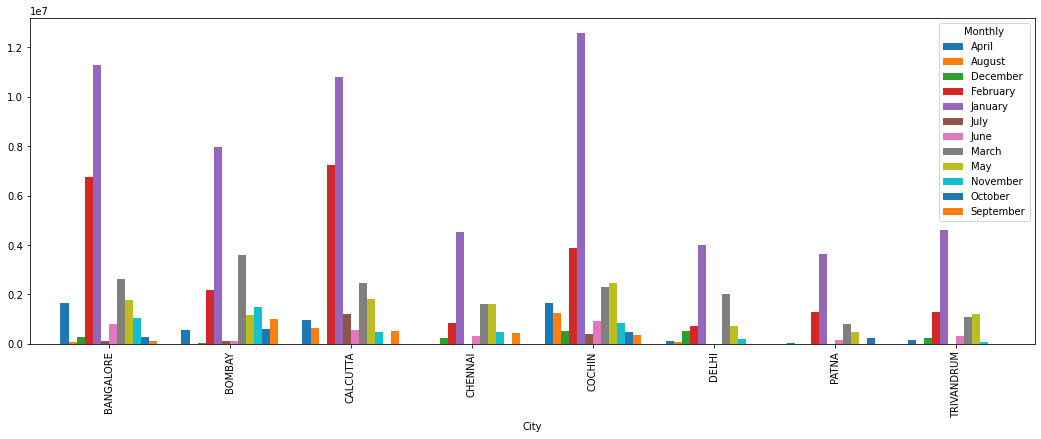

In [563]:

city_m = pd.pivot_table(data = cust_post_trans,index=["City"],columns="Monthly",aggfunc="sum",values="Amount")
city_m.plot(kind="bar",figsize=(18,6),width=0.8)

<AxesSubplot:xlabel='Yearly'>

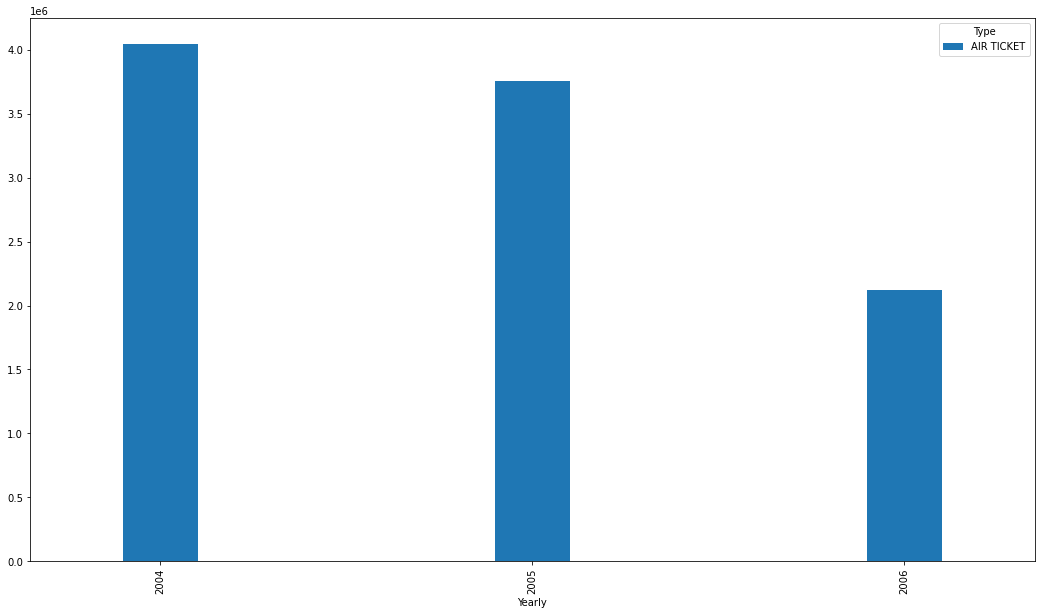

In [564]:
year_f = pd.pivot_table(data = cust_post_trans,index=["Yearly"],columns=[cust_post_trans["Type"][cust_post_trans["Type"] =="AIR TICKET"] ],aggfunc="sum",values="Amount")
year_f.plot(kind ="bar",figsize=(18,10),width =0.2)

<AxesSubplot:xlabel='Product'>

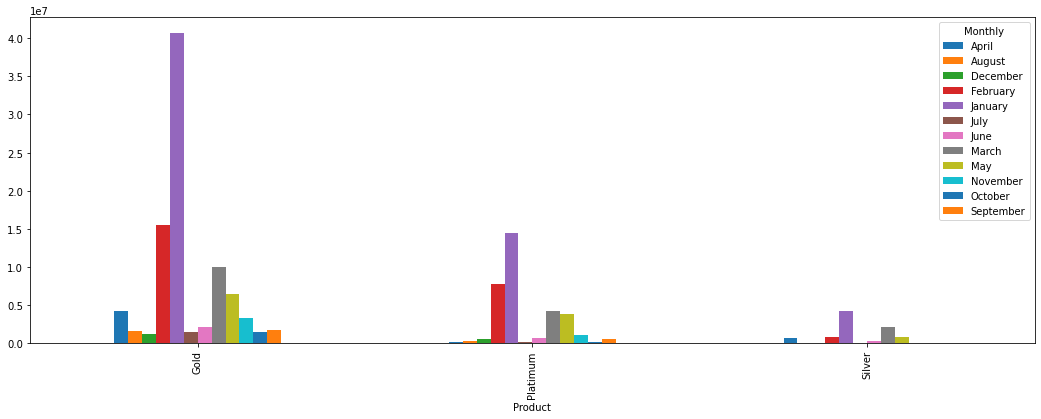

In [565]:
month_f = pd.pivot_table(data = cust_post_trans,index=["Product"],columns=["Monthly"],aggfunc="sum",values="Amount")
month_f.plot(kind="bar",figsize=(18,6))

In [605]:
def find_cust(cust,product,period="Monthly",inplace = False ) :
    copy_cust = cust
    pr_list = cust[period].drop_duplicates().to_list()
    print(pr_list)
    copy_cust = pd.pivot_table(data = copy_cust , index = ["City","Customer"],columns=copy_cust[period][copy_cust.Product == product],aggfunc = "sum",values = "Repayed_Amount")
    if inplace :
        cust = copy_cust 
        pass
    else:
        return copy_cust
find_cust(cust_post_trans,"Gold","Monthly")

['January', 'February', 'April', 'November', 'May', 'March', 'July', 'August', 'September', 'June', 'October', 'December']


Monthly                   April     August   December    February     January  \
City       Customer                                                             
BANGALORE  A1          79849.19        NaN        NaN  1056512.48  3691222.98   
           A13        160898.98  221431.58        NaN  3103175.79  1584771.80   
           A14        453661.84        NaN  388821.96  2262375.03   756533.22   
           A30              NaN        NaN        NaN    67056.51   580309.64   
           A43              NaN        NaN        NaN  1248059.20  3400070.05   
           A63              NaN        NaN        NaN         NaN         NaN   
           A81              NaN        NaN        NaN         NaN         NaN   
           A88              NaN        NaN        NaN         NaN         NaN   
           A92        459105.69        NaN        NaN         NaN         NaN   
BOMBAY     A12        171574.18        NaN        NaN  1615841.00   932217.94   
           A17              NaN        NaN        NaN         NaN  1060751.14   
           A42              NaN        NaN        NaN   930880.75  3362886.85   
           A62        164796.79        NaN        NaN   113317.83         NaN   
           A91        247781.00        NaN        NaN         NaN         NaN   
CALCUTTA   A10              NaN        NaN        NaN   227778.83   794118.34   
           A15              NaN        NaN        NaN   322123.69  1642661.65   
           A29              NaN        NaN        NaN         NaN  1585372.15   
           A31              NaN        NaN        NaN   899856.54         NaN   
           A60       1093539.66  686021.32        NaN  1295431.18  5123723.21   
           A89        497237.97        NaN        NaN         NaN         NaN   
CHENNAI    A27              NaN        NaN        NaN         NaN   989694.41   
           A67              NaN        NaN        NaN         NaN    67845.60   
COCHIN     A11              NaN  332677.61        NaN   743261.55   916949.86   
           A16              NaN        NaN        NaN   280785.41  1392434.96   
           A32              NaN   99528.43        NaN         NaN         NaN   
           A45        372124.51        NaN  410935.52   832647.23  3722517.35   
           A61       1446505.33  395608.26        NaN  1345911.54  3367994.05   
           A65              NaN        NaN        NaN         NaN   468922.60   
           A90        109931.32        NaN        NaN         NaN         NaN   
           A94              NaN        NaN        NaN         NaN   153465.89   
DELHI      A44              NaN        NaN        NaN   722964.24  4405972.87   
           A64              NaN        NaN  212614.48         NaN         NaN   
           A82              NaN        NaN        NaN         NaN         NaN   
           A93              NaN        NaN        NaN         NaN   342326.14   
PATNA      A26              NaN        NaN        NaN         NaN  1057624.10   
           A66              NaN        NaN        NaN         NaN   477039.78   
           A95              NaN        NaN        NaN         NaN   369405.96   
TRIVANDRUM A28              NaN        NaN  451630.26         NaN   404266.23   

Monthly                   July       June       March         May    November  \
City       Customer                                                             
BANGALORE  A1              NaN        NaN         NaN         NaN   402099.78   
           A13             NaN  210782.51   575551.13         NaN   622592.45   
           A14             NaN    9887.74   782768.78         NaN    22692.95   
           A30             NaN        NaN         NaN  1190528.69         NaN   
           A43             NaN        NaN  1540229.91  1358982.72         NaN   
           A63             NaN        NaN         NaN         NaN   211117.12   
           A81             NaN        NaN   207780.32         NaN         NaN   
           A88             NaN